### Improvements 
## IMP: Fitrar por la surface--remove events that move out of the surface on the first 3 secons
1) Remove blinks and interpolate values using cubic splines
2) Blank filtering of data---Done-- maibe explore other filter
3) Frequency analysis of the signal??
4) Remove trials with z scores over [2,-2]
5) Convert time to seconds
6) Open PLA file
7) Statistics of signal ¿How to compare surprise signals?
8) Amplitud, velocidad de cambio
9) Cut the whole signal of interest from the beggining
10) Fitrar por la surface

REfinements:
1) filter by surface
2) avoid experiments with a std too high
3) save images

### Simple pupillometry code to merge different experiments


In [3]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append('../')
import commons as cm
from data_curation import Normalization
from pandasql import sqldf
import pupillometry_commons as cp
from itertools import compress
nm=Normalization()

session_location = Path(r"D:/")
sessions=[]
df_list=[]
windows_s=3
seconds_norm=0.05
with open('session.txt','r') as f:
    for session in f:
            sessions.append(session.replace('\n',''))
f.close()

session_loc_list=[session_location.joinpath(session,'01 Processing_data','pupil_labs') for session in sessions ]
session_raw_list=[session_location.joinpath(session, '00 Raw_data','pupil_labs') for session in sessions ]

image_loc_list=[session_location.joinpath(session,'images_order') for session in sessions ]

for subject, recording_location in zip(sessions,session_loc_list):
    recording_folder=[record for record in os.listdir(recording_location)  if '00' in record]
    print(recording_folder)
    index_aux = list(map(lambda x: not('_' in x), recording_folder))
    recording_folder=list(compress(recording_folder,index_aux))
    #Load data in folders
    if len(recording_folder)>1:
        ValueError('Ambiguty in folder of experiment')
    recording_location=recording_location.joinpath(recording_folder[0],'exports')
    recording_location_raw=recording_location.joinpath(recording_folder[0],'exports')
    export_folder=[record for record in os.listdir(recording_location)  if '00' in record]
    if len(export_folder)>1:
        ValueError('Ambiguty in folder of exports')
    recording_location=recording_location.joinpath(export_folder[0])

    gaze_surf_csv=[record for record in os.listdir(recording_location.joinpath('surfaces'))  if 'gaze_positions' in record][0]

    print(f'Analixing session: {subject}')

    exported_pupil_csv = recording_location.joinpath('pupil_positions.csv')
    pupil_pd_frame = pd.read_csv(exported_pupil_csv)
    exported_gaze_csv = os.path.join(recording_location,'gaze_positions.csv')
    gaze_pd_frame = pd.read_csv(exported_gaze_csv)
    annotations_csv = os.path.join(recording_location,'annotations.csv')
    annotations_pd = pd.read_csv(annotations_csv)
    surface_gaze_csv = os.path.join(recording_location, 'surfaces',gaze_surf_csv)
    surfaces_pd_frame = pd.read_csv(surface_gaze_csv)

    #Execute analysis
    df=cp.calculate_pupillometry(pupil_pd_frame,annotations_pd,recording_location,
                                 window_s=windows_s,
                                 seconds_norm=seconds_norm,
                                 signal_str='diameter_3d_cubic_z_score')
    df['session']=subject
    df_list.append(df)

['002']
Analixing session: ES0001_S003_PC_EM


,index,timestamp,label,duration
0,6037,7977.395531,blank_0,NaN


index                  38265
timestamp        8517.385911
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 125.91932552535617
sampling frequency for left eye is 124.48855842067027
Total blinks time left 293.22s and right 460.97s of a total of 537.56s left and 531.46s right
Total blinks time left 54.55% 
Total blinks time right 86.74% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 373 correspond to 3s
['ES0001_S004_Script.txt', '005']
Analixing session: ES0001_S004_PC_EM


,index,timestamp,label,duration
0,3923,11754.334501,blank_0,NaN


index                  20061
timestamp       12295.135488
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93224037995772
sampling frequency for left eye is 123.93226696367957
Total blinks time left 77.39s and right 65.16s of a total of 540.79s left and 540.79s right
Total blinks time left 14.31% 
Total blinks time right 12.05% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES0001_S005_Script.txt', '006']
Analixing session: ES0001_S005_PC_EM


,index,timestamp,label,duration
0,6736,13058.92485,blank_0,NaN


index                  22873
timestamp        13599.66347
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93212452766575
sampling frequency for left eye is 123.93023048885034
Total blinks time left 166.11s and right 103.05s of a total of 540.73s left and 540.73s right
Total blinks time left 30.72% 
Total blinks time right 19.06% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['007']
Analixing session: ES0001_S006_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['di

,index,timestamp,label,duration
0,24426,16002.012757,blank_0,NaN


index                  56704
timestamp       16542.924445
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93247405412919
sampling frequency for left eye is 123.92966575682624
Total blinks time left 38.08s and right 29.19s of a total of 540.90s left and 540.91s right
Total blinks time left 7.04% 
Total blinks time right 5.40% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES0001_S008_Script.txt', '004']
Analixing session: ES0001_S008_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

,index,timestamp,label,duration
0,13389,1614.779532,blank_0,NaN


index                  45617
timestamp        2154.763955
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93144477676395
sampling frequency for left eye is 124.4523212175781
Total blinks time left 59.52s and right 128.43s of a total of 537.72s left and 539.98s right
Total blinks time left 11.07% 
Total blinks time right 23.79% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 373 correspond to 3s
['ES0001_S009_Script.txt', '008']
Analixing session: ES0001_S009_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

,index,timestamp,label,duration
0,4076,2626.094032,blank_0,NaN


index                  36304
timestamp        3166.080345
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.92507608089832
sampling frequency for left eye is 123.93065319184159
Total blinks time left 70.11s and right 53.28s of a total of 539.98s left and 539.98s right
Total blinks time left 12.98% 
Total blinks time right 9.87% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['009']
Analixing session: ES0001_S010_PC_EM


,index,timestamp,label,duration
0,11749,6403.109787,blank_0,NaN


index                  43949
timestamp         6943.54162
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.98281749804983
sampling frequency for left eye is 124.05820587109346
Total blinks time left 232.65s and right 306.19s of a total of 539.86s left and 540.17s right
Total blinks time left 43.09% 
Total blinks time right 56.68% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['002']
Analixing session: ES0001_S011_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye

,index,timestamp,label,duration
0,3563,3047.882941,blank_0,NaN


index                  35860
timestamp          3589.0257
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93216773192913
sampling frequency for left eye is 123.93401368284813
Total blinks time left 266.98s and right 25.50s of a total of 541.13s left and 541.13s right
Total blinks time left 49.34% 
Total blinks time right 4.71% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['001']
Analixing session: ES0001_S012_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

,index,timestamp,label,duration
0,2750,5236.08809,blank_0,NaN


index                  34995
timestamp        5776.977738
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.90209274232477
sampling frequency for left eye is 123.9288811365415
Total blinks time left 62.48s and right 60.28s of a total of 540.87s left and 540.88s right
Total blinks time left 11.55% 
Total blinks time right 11.15% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['006']
Analixing session: ES0001_S013_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

,index,timestamp,label,duration
0,5673,3600.426023,blank_0,NaN


index                  37900
timestamp        4140.408458
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93235686772545
sampling frequency for left eye is 123.93145556387111
Total blinks time left 175.85s and right 13.31s of a total of 539.98s left and 539.97s right
Total blinks time left 32.57% 
Total blinks time right 2.47% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['003']
Analixing session: ES0001_S015_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

,index,timestamp,label,duration
0,6736,13058.924854,blank_0,NaN


index                  22873
timestamp       13599.663467
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93212452766575
sampling frequency for left eye is 123.93023048885034
Total blinks time left 166.11s and right 103.05s of a total of 540.73s left and 540.73s right
Total blinks time left 30.72% 
Total blinks time right 19.06% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES0001_S017_Script.txt', '005']
Analixing session: ES0001_S017_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['di

,index,timestamp,label,duration
0,2870,23771.222563,blank_0,NaN


index                  35097
timestamp       24311.211911
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93235891447502
sampling frequency for left eye is 123.93509453854392
Total blinks time left 99.71s and right 133.11s of a total of 539.97s left and 539.98s right
Total blinks time left 18.47% 
Total blinks time right 24.65% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES001_S018_Script.txt', '006']
Analixing session: ES0001_S018_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['di

,index,timestamp,label,duration
0,5689,30085.311756,blank_0,NaN


index                  37917
timestamp       30625.288812
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93234194916906
sampling frequency for left eye is 123.96170241928505
Total blinks time left 161.80s and right 325.50s of a total of 539.84s left and 539.97s right
Total blinks time left 29.97% 
Total blinks time right 60.28% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES001_S019_Script.txt', '000']
Analixing session: ES0001_S019_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye

,index,timestamp,label,duration
0,4181,4215.016075,blank_0,NaN


index                  36408
timestamp        4755.012764
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.92520299430477
sampling frequency for left eye is 123.93442933466798
Total blinks time left 484.53s and right 143.72s of a total of 539.98s left and 539.98s right
Total blinks time left 89.73% 
Total blinks time right 26.62% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES0001_S020_Script.txt', '001']
Analixing session: ES0001_S020_PC_EM


,index,timestamp,label,duration
0,7625,9572.150979,blank_0,NaN


index                  39854
timestamp       10112.144156
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.97295546251496
sampling frequency for left eye is 123.95094581632272
Total blinks time left 49.63s and right 161.87s of a total of 539.90s left and 539.79s right
Total blinks time left 9.19% 
Total blinks time right 29.99% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES0001_S022_Script.txt', '003']
Analixing session: ES0001_S022_PC_EM


,index,timestamp,label,duration
0,6231,21605.402144,blank_0,NaN


index                  38467
timestamp       22145.537089
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.92823997814095
sampling frequency for left eye is 123.93008313418737
Total blinks time left 90.56s and right 75.91s of a total of 540.13s left and 540.13s right
Total blinks time left 16.77% 
Total blinks time right 14.05% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['20230419__ES0001_S023_Script.txt', '004']
Analixing session: ES0001_S023_PC_EM


,index,timestamp,label,duration
0,20529,30746.082315,blank_0,NaN


index                  52809
timestamp       31286.967956
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 124.08206694722719
sampling frequency for left eye is 123.93246634593426
Total blinks time left 172.20s and right 180.89s of a total of 540.88s left and 540.22s right
Total blinks time left 31.84% 
Total blinks time right 33.48% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['000']
Analixing session: ES0001_S024_PC_EM


,index,timestamp,label,duration
0,4006,6067.756932,blank_0,NaN


index                  36234
timestamp        6607.750312
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93226135414996
sampling frequency for left eye is 123.93223796131947
Total blinks time left 38.76s and right 39.02s of a total of 539.98s left and 539.99s right
Total blinks time left 7.18% 
Total blinks time right 7.23% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES001_S0025_Script_Check.txt', '002']
Analixing session: ES0001_S025_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

,index,timestamp,label,duration
0,22584,10760.888059,blank_0,NaN


index                  54809
timestamp       11300.860597
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93590949440907
sampling frequency for left eye is 123.93130890848524
Total blinks time left 36.75s and right 90.56s of a total of 539.97s left and 539.95s right
Total blinks time left 6.81% 
Total blinks time right 16.77% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['004']
Analixing session: ES0001_S026_PC_EM


,index,timestamp,label,duration
0,3581,15386.923649,blank_0,NaN


index                  35861
timestamp       15927.785658
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.95966368189208
sampling frequency for left eye is 124.11204606210828
Total blinks time left 138.66s and right 97.28s of a total of 540.06s left and 540.73s right
Total blinks time left 25.67% 
Total blinks time right 17.99% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES001_S027_Script.txt', '001']
Analixing session: ES0001_S027_PC_EM


,index,timestamp,label,duration
0,5596,2786.052314,blank_0,NaN


index                  37825
timestamp        3326.064992
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 124.14110024663375
sampling frequency for left eye is 124.07664277482452
Total blinks time left 164.48s and right 292.70s of a total of 539.38s left and 539.10s right
Total blinks time left 30.49% 
Total blinks time right 54.29% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES0001_S028_Script.txt', '002']
Analixing session: ES0001_S028_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['di

,index,timestamp,label,duration
0,3483,586.934358,blank_0,NaN


index                  35775
timestamp        1127.956286
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.6904270491012
sampling frequency for left eye is 123.69225015483849
Total blinks time left 79.40s and right 28.21s of a total of 541.00s left and 541.01s right
Total blinks time left 14.68% 
Total blinks time right 5.21% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 371 correspond to 3s
['ES001_S029_Script.txt', '004']
Analixing session: ES0001_S029_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

,index,timestamp,label,duration
0,3435,11197.80815,blank_0,NaN


index                  35651
timestamp       11738.451173
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 124.02694465679838
sampling frequency for left eye is 124.22684101505746
Total blinks time left 372.31s and right 353.03s of a total of 539.35s left and 539.54s right
Total blinks time left 69.03% 
Total blinks time right 65.43% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 373 correspond to 3s
['ES001_S030_Script.txt', '005']
Analixing session: ES0001_S030_PC_EM


,index,timestamp,label,duration
0,4834,13698.920251,blank_0,NaN


index                  37127
timestamp       14240.031138
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.9455607734842
sampling frequency for left eye is 123.98951962037451
Total blinks time left 119.25s and right 183.29s of a total of 540.85s left and 541.04s right
Total blinks time left 22.05% 
Total blinks time right 33.88% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s
['ES001_S031_Script.txt', '006']
Analixing session: ES0001_S031_PC_EM


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

,index,timestamp,label,duration
0,2945,17260.150149,blank_0,NaN


index                  35238
timestamp       17801.213507
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
z:\backup_antiguo_ordenador\escri

sampling frequency for right eye is 123.93908144435275
sampling frequency for left eye is 125.31114976764303
Total blinks time left 408.04s and right 225.13s of a total of 535.10s left and 541.02s right
Total blinks time left 76.25% 
Total blinks time right 41.61% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 376 correspond to 3s


z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
z:\backup_antiguo_ordenador\escritorio\projects\pupil_labs\analysis\pupil_labs_analysis\analysis\pupillometry\pupillometry_commons.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pup

### Lets plot the figures

In [4]:
df_concat=pd.concat(df_list)
df_concat.index.name='index1'
df_concat_group=df_concat.groupby('index1')
df_concat['session'].unique()


array(['ES0001_S003_PC_EM', 'ES0001_S004_PC_EM', 'ES0001_S005_PC_EM',
       'ES0001_S006_PC_EM', 'ES0001_S008_PC_EM', 'ES0001_S009_PC_EM',
       'ES0001_S010_PC_EM', 'ES0001_S011_PC_EM', 'ES0001_S012_PC_EM',
       'ES0001_S013_PC_EM', 'ES0001_S015_PC_EM', 'ES0001_S017_PC_EM',
       'ES0001_S018_PC_EM', 'ES0001_S019_PC_EM', 'ES0001_S020_PC_EM',
       'ES0001_S022_PC_EM', 'ES0001_S023_PC_EM', 'ES0001_S024_PC_EM',
       'ES0001_S025_PC_EM', 'ES0001_S026_PC_EM', 'ES0001_S027_PC_EM',
       'ES0001_S028_PC_EM', 'ES0001_S029_PC_EM', 'ES0001_S030_PC_EM',
       'ES0001_S031_PC_EM'], dtype=object)

In [5]:
window_frames=df_concat.index.max()+1#np.round(windows_s*120).astype(int)
window=range(0,window_frames)
time_x=np.linspace(0,windows_s,window_frames)

In [6]:
%matplotlib qt
df_concat_mean=df_concat_group.mean()
df_concat_std=df_concat_group.std()

filter_assets=list(df_concat_mean.columns)
filter_surprise=list(df_concat_mean.columns)

filter_assets=[asset for asset in filter_assets if 'Asset' in asset ]
filter_surprise=[asset for asset in filter_surprise if 'Surprise' in asset ]

mat=df_concat_mean.reindex(columns=filter_assets).values
mat_std=df_concat_std.reindex(columns=filter_assets).values

mat2=df_concat_mean.reindex(columns= filter_surprise).values
mat2_std=df_concat_std.reindex(columns= filter_surprise).values

fig, ax=plt.subplots(1,1)
ax.plot(time_x,mat)
ax.plot(time_x,np.mean(mat,axis=1),linewidth=5,color='black')
# ax.legend([images,'assets mean'])
ax.set_title('Raw assets and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter(mm)')


fig, ax=plt.subplots(1,1)
ax.plot(time_x,mat2)
ax.plot(time_x,np.mean(mat2,axis=1),linewidth=5,color='black')
ax.set_title('Raw surprise and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter (mm)')


fig, ax=plt.subplots(1,1)
ax.errorbar(time_x,np.mean(mat,axis=1),np.std(mat_std,axis=1),linewidth=2,color='blue')
ax.errorbar(time_x,np.mean(mat2,axis=1),np.std(mat2_std,axis=1),linewidth=0.5,color='red')
ax.legend(['surprise','assets'])
ax.plot(time_x,np.mean(mat2,axis=1),linewidth=2,color='black')
ax.plot(time_x,np.mean(mat,axis=1),linewidth=2,color='black')


C:\Users\arturoV\AppData\Local\Temp\ipykernel_15384\483905385.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_concat_mean=df_concat_group.mean()
C:\Users\arturoV\AppData\Local\Temp\ipykernel_15384\483905385.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_concat_std=df_concat_group.std()


In [ ]:
pupil_events_speed=np.abs(np.diff(mat))
pupil_surprise_speed=np.abs(np.diff(mat2))

In [ ]:
%matplotlib qt

pupil_events_speed
pupil_surprise_speed

fig, ax=plt.subplots(1,1)
ax.plot(time_x,pupil_events_speed[window])
ax.plot(time_x,np.mean(pupil_events_speed[window,:],axis=1),linewidth=5,color='black')
# ax.legend([images,'assets mean'])
ax.set_title('Raw assets and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter(mm)')

fig, ax=plt.subplots(1,1)
ax.plot(time_x,pupil_surprise_speed[window,:])
ax.plot(time_x,np.mean(pupil_surprise_speed[window,:],axis=1),linewidth=5,color='black')
ax.set_title('Raw surprise and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter (mm)')


fig, ax=plt.subplots(1,1)
ax.plot(time_x,np.mean(pupil_surprise_speed[window,:],axis=1),linewidth=2,color='blue')
ax.plot(time_x,np.mean(pupil_events_speed[window,:],axis=1),linewidth=2,color='black')

ax.legend(['surprise','assets'])
ax.set_title('Mean pupilometry')
ax.set_xlabel('time (s)')
ax.set_ylabel('speed (s)')

Text(0, 0.5, 'speed (s)')

In [ ]:
filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 
filter_events_all=~annotations_pd['label'].str.contains('EndOfExperiment') 
filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')
time_x=np.linspace(0,2,248)
event=annotations_pd.loc[filter_events,['label']].values.flatten()
events=[image.split('.')[0] for image in event]
events

['Asset0018',
 'Asset0015',
 'Asset0034',
 'Asset0040',
 'Asset0014',
 'Asset0016',
 'Asset0041',
 'Surprise01',
 'Asset0001',
 'Asset0043',
 'Asset0044',
 'Asset0028',
 'Asset0005',
 'Asset0026',
 'Asset0048',
 'Asset0033',
 'Asset0035',
 'Surprise02',
 'Asset0049',
 'Asset0017',
 'Asset0008',
 'Asset0036',
 'Asset0030',
 'Asset0032',
 'Asset0007',
 'Asset0029',
 'Surprise03',
 'Asset0031',
 'Asset0006',
 'Asset0050',
 'Asset0047',
 'Asset0046',
 'Asset0011',
 'Asset0021',
 'Asset0024',
 'Asset0039',
 'Asset0004',
 'Surprise04',
 'Asset0010',
 'Asset0003',
 'Asset0037',
 'Asset0020',
 'Asset0012',
 'Asset0022',
 'Asset0002',
 'Asset0045',
 'Asset0009',
 'Asset0042',
 'Asset0027']

### Filter data that is inside the surface
#### Due to the fact that te gaze timesatmp of the surface is obtained by combining data from both pupils we cant just merge by the timestamp. We have to read and duplicate values

In [ ]:
# pupil_pd_frame['join_index']=np.nan
# surfaces_pd_frame['join_index']=np.nan


In [ ]:
# pupil_list=[]
# surface_list=[]
# ref_col_gaze=surfaces_pd_frame.columns.get_indexer(['gaze_timestamp'])[0]
# ref_col_index=surfaces_pd_frame.columns.get_indexer(['join_index'])[0]

# timestamps=pupil_pd_frame['pupil_timestamp'].values

# for row in range(surfaces_pd_frame.shape[0]-1):
#         ini_value=surfaces_pd_frame.iloc[row,ref_col_gaze]
#         end_value=surfaces_pd_frame.iloc[row+1,ref_col_gaze]
#         # print(ini_value,end_value)
#         index_1=(timestamps>=ini_value)&(timestamps< end_value)
          
#         pupil_pd_frame.loc[index_1,['join_index']]=row
#         surfaces_pd_frame.iloc[row,ref_col_index]=row
# final_df=pd.merge(pupil_pd_frame, surfaces_pd_frame, on="join_index", how="left",suffixes=['','_sur'])
# final_df.head()


In [ ]:
# surfaces_pd_frame['start']=surfaces_pd_frame['gaze_timestamp']
# surfaces_pd_frame['end']=np.append(surfaces_pd_frame['gaze_timestamp'].values[1:],0)
# surfaces_pd_frame.drop(surfaces_pd_frame.tail(1).index,inplace=True)
# surfaces_pd_frame
# df= pd.merge_asof(pupil_pd_frame, surfaces_pd_frame, left_on='pupil_timestamp', right_on='start', direction='forward',suffixes=['','_sur'])
# df = df[df['pupil_timestamp'] <= df['end']]
# pupil_pd_frame=df

### Cut all data by annotations of interest

In [ ]:
# pupil_pd_frame=final_df

from IPython.display import display

event_initial=annotations_pd['label'].values[0]
event_final=annotations_pd['label'].values[-1]

initial_anotation,_,_=cm.extract_annotations_timestamps(event_initial,'label',annotations_pd)
end_anotation=annotations_pd.iloc[-1]
display(initial_anotation)
display(end_anotation)

pupil_pd_frame=cm.filter_rows_by_temporal_values(
         dataframe=pupil_pd_frame,
         time_column='pupil_timestamp',
         ini_value=initial_anotation['timestamp'].values[0],
         end_value=end_anotation['timestamp']
         )

,index,timestamp,label,duration,timestamp_s
0,6736,13058.924854,blank_0,NaN,0.0


index                    22873
timestamp         13599.663467
label          EndOfExperiment
duration                   NaN
timestamp_s         540.738613
Name: 162, dtype: object

## Extract the data
Extracting pupil 3d data for analysis

In [ ]:
from IPython.display import display
pupil_pd_frame['on_surf']=True
confidence_thr=1
 
# filter for 3d data
detector_3d_data = pupil_pd_frame[pupil_pd_frame.method == 'pye3d 0.3.0 real-time']

pupil_left_eye_interpolated=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_interpolated=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0)& (pupil_pd_frame['on_surf']==True)]

left_conf_index=(pupil_left_eye_interpolated['confidence']>=confidence_thr).values
right_conf_index=(pupil_right_eye_interpolated['confidence']>=confidence_thr).values

pupil_left_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)]
pupil_right_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)]

blinks_left_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']< confidence_thr)]
blinks_right_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']< confidence_thr)]

pupil_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

pupil_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

blinks_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']< confidence_thr)& (pupil_pd_frame['on_surf']==True)]
blinks_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']< confidence_thr)& (pupil_pd_frame['on_surf']==True)]

out_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

In [ ]:
pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
                                                x=pupil_left_eye_interpolated.loc[left_conf_index,['pupil_timestamp']].values.flatten(),
                                                y= pupil_left_eye_interpolated.loc[left_conf_index,['diameter_3d']].values.flatten(),
                                                x_interpolate=pupil_left_eye_interpolated['pupil_timestamp'].values.flatten()
                                                )

pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
                                                x=pupil_right_eye_interpolated.loc[right_conf_index,['pupil_timestamp']].values.flatten(),
                                                y= pupil_right_eye_interpolated.loc[right_conf_index,['diameter_3d']].values.flatten(),
                                                x_interpolate=pupil_right_eye_interpolated['pupil_timestamp'].values.flatten()
                                                )


filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 
filter_events_all=~annotations_pd['label'].str.contains('EndOfExperiment') 


filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')

print("eye0 (right eye) data:")
display(pupil_right_eye[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))

print("eye1 data (left eye) data:")
display(pupil_left_eye[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))


eye0 (right eye) data:


C:\Users\arturoV\AppData\Local\Temp\ipykernel_25572\1084852889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
C:\Users\arturoV\AppData\Local\Temp\ipykernel_25572\1084852889.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
40776,13058.927290,0,1.0,0.485316,0.418614,3.977882
40781,13058.935264,0,1.0,0.485276,0.418809,3.977099
40785,13058.943270,0,1.0,0.484928,0.418454,3.978508
40789,13058.951245,0,1.0,0.485426,0.418196,3.980086
40793,13058.959246,0,1.0,0.485440,0.418731,3.974571
40797,13058.967279,0,1.0,0.485261,0.418267,3.969203
40801,13058.975271,0,1.0,0.485669,0.418401,3.974176
40804,13058.983267,0,1.0,0.485604,0.418370,3.953271
40807,13058.991122,0,1.0,0.485446,0.418666,3.951038
40810,13058.999143,0,1.0,0.485145,0.418349,3.947132


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
40774,13058.927111,1,1.0,0.455756,0.568311,4.552916
40779,13058.935122,1,1.0,0.455942,0.568305,4.549833
40782,13058.943131,1,1.0,0.455797,0.568380,4.548611
40786,13058.951115,1,1.0,0.455780,0.568139,4.535508
40790,13058.959135,1,1.0,0.455926,0.568205,4.536191
40795,13058.967133,1,1.0,0.455920,0.567763,4.536211
40800,13058.975271,1,1.0,0.455933,0.567842,4.532886
40802,13058.983267,1,1.0,0.455966,0.567776,4.533625
40808,13058.991244,1,1.0,0.456024,0.567960,4.528622
40813,13058.999266,1,1.0,0.456251,0.568305,4.495131


df to analyse


In [ ]:
pupil_left_eye=pupil_left_eye
pupil_right_eye=pupil_right_eye

blinks_left_eye=blinks_left_eye
blinks_right_eye=blinks_right_eye

In [ ]:
recording_location
parts = list(recording_location.parts)
parts=parts[0:-2]
parts=Path(*parts)
parts

WindowsPath('P:/Proyectos/2020/PY200016 - XSCAPE/Trabajo/00 XPERIMENTS/01 EXPERIMENTS_Santiago/01 ONGOING/Exp_Stgo_0001/SESSIONS/ES0001_S015_PC_EM/01 Processing_data/pupil_labs/003')

In [ ]:
import json
f = open(parts.joinpath('info.player.json'))
data = json.load(f)
time_whole_recording=data['duration_s']
time_roi_left=abs(pupil_left_eye['pupil_timestamp'].values[-1]-pupil_left_eye['pupil_timestamp'].values[0])
time_roi_right=abs(pupil_right_eye['pupil_timestamp'].values[-1]-pupil_right_eye['pupil_timestamp'].values[0])

pupil_sampling_freq_left=(pupil_left_eye.shape[0]+blinks_left_eye.shape[0])/time_roi_left
pupil_sampling_freq_right=(pupil_right_eye.shape[0]+blinks_right_eye.shape[0])/time_roi_right 
print('sampling frequency for right eye is {}'.format(pupil_sampling_freq_right)) 
print('sampling frequency for left eye is {}'.format(pupil_sampling_freq_left)) 

# Closing file
f.close()


sampling frequency for right eye is 123.93212452766575
sampling frequency for left eye is 123.93023048885034


##  Explore blinks and Asses data quality, are there many regions with data gaps? 


### Asses data quality

In [ ]:
total_blinks_left=blinks_left_eye.shape[0]/pupil_sampling_freq_left
total_blinks_right=blinks_right_eye.shape[0]/pupil_sampling_freq_right
print(f'Total blinks time left {total_blinks_left:.2f}s and right {total_blinks_right:.2f}s of a total of {time_roi_left:.2f}s left and {time_roi_right:.2f}s right')
print(f'Total blinks time left {total_blinks_left/time_roi_left:.2%} ')
print(f'Total blinks time right {total_blinks_right/time_roi_right:.2%} ')


Total blinks time left 166.11s and right 103.05s of a total of 540.73s left and 540.73s right
Total blinks time left 30.72% 
Total blinks time right 19.06% 


## Put timestamp data in seconds


In [ ]:
pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
pupil_left_eye['timestamp_s']

pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
pupil_right_eye['timestamp_s']

annotations_pd['timestamp_s']=annotations_pd['timestamp']-annotations_pd['timestamp'].values[0]


C:\Users\arturoV\AppData\Local\Temp\ipykernel_25572\2321012662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
C:\Users\arturoV\AppData\Local\Temp\ipykernel_25572\2321012662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]


### View Raw data

Text(0.5, 1.0, 'Both eyes')

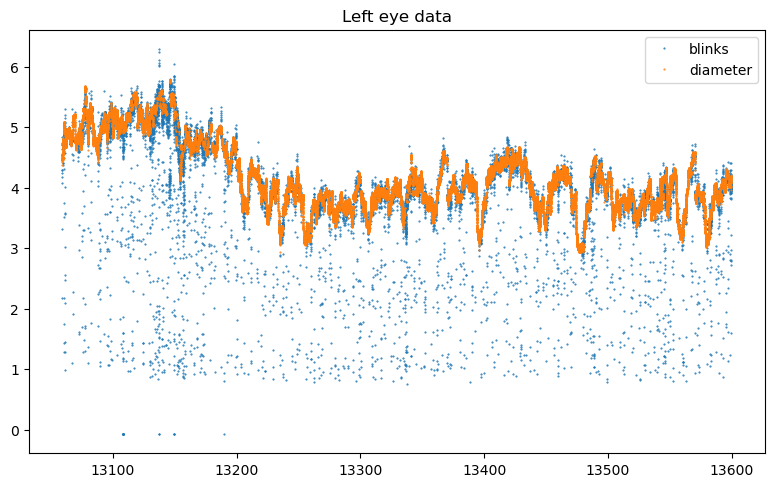

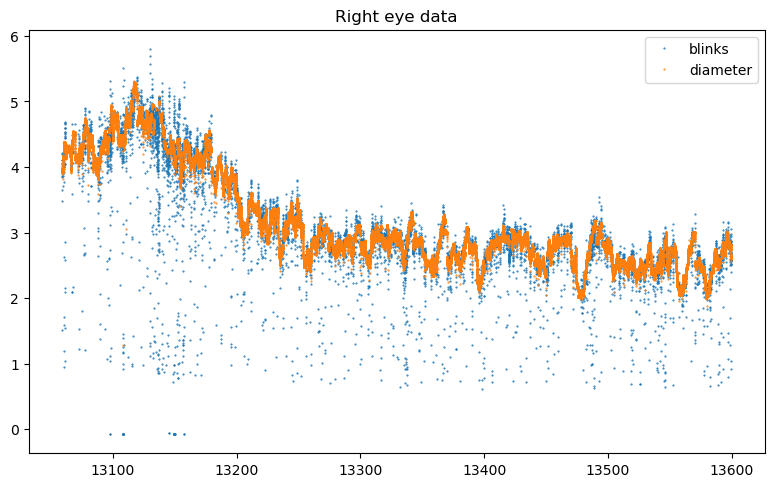

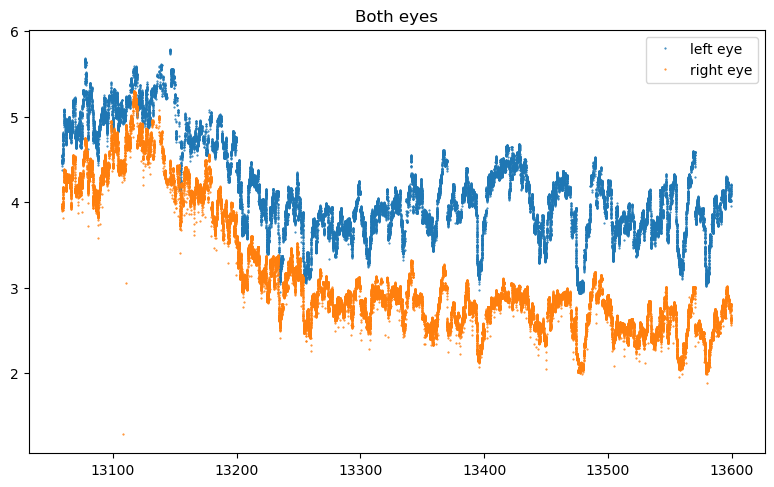

In [ ]:
%matplotlib inline
#for left eye
fig, ax=plt.subplots(1,1)
ax.plot(blinks_left_eye['pupil_timestamp'],blinks_left_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_left_eye['pupil_timestamp'],pupil_left_eye['diameter_3d'],'.',markersize=1)
ax.legend(['blinks','diameter'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Left eye data')

#for right eye
fig, ax=plt.subplots(1,1)
ax.plot(blinks_right_eye['pupil_timestamp'],blinks_right_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_right_eye['pupil_timestamp'],pupil_right_eye['diameter_3d'],'.',markersize=1)
ax.legend(['blinks','diameter'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Right eye data')

fig, ax=plt.subplots(1,1)
ax.plot(pupil_left_eye['pupil_timestamp'],pupil_left_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_right_eye['pupil_timestamp'],pupil_right_eye['diameter_3d'],'.',markersize=1)
ax.legend(['left eye','right eye'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Both eyes')



### Do cubic splines aeasily, in the future use a better blink detection algorithm

In [ ]:
%matplotlib qt


fig, ax = plt.subplots(2,1,figsize=(15, 8))
ax[0].plot(pupil_left_eye_interpolated['pupil_timestamp'], pupil_left_eye_interpolated['diameter_3d'], 'o', label='data')
ax[0].plot(pupil_left_eye_interpolated['pupil_timestamp'], pupil_left_eye_interpolated['diameter_3d_cubic'],'.', label="interpolated")
ax[0].legend(loc='lower right', ncol=2)
ax[0].set_title('left eye')
ax[0].set_xlabel('sample')
ax[0].set_ylabel('diameter (mm)')


ax[1].plot(pupil_right_eye_interpolated['pupil_timestamp'], pupil_right_eye_interpolated['diameter_3d'], 'o', label='data')
ax[1].plot(pupil_right_eye_interpolated['pupil_timestamp'], pupil_right_eye_interpolated['diameter_3d_cubic'],'.', label="interpolated")
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_title('right eye')
ax[1].set_xlabel('sample')
ax[1].set_ylabel('diameter (mm)')
fig.tight_layout()

usaing smooting splines

## 

In [ ]:
time_col_str='timestamp_s'
signal_str='diameter_3d'
sns.set_theme()

%matplotlib qt
fig1, ax=plt.subplots(1,)
ax.plot(pupil_left_eye[time_col_str],pupil_left_eye[signal_str],'.')
for  index, row in annotations_pd[filter_events].iterrows():
    plt.axvline(row[time_col_str], color='r', label='axvline - full height')
    ax.text((row[time_col_str]),3,row['label'])
ax.set_title('pupil diameter and events')    
ax.set_xlabel(f'{time_col_str}')
ax.set_ylabel(f'{signal_str}')
fig1.set_size_inches((18, 5.5))

fig2, ax=plt.subplots(1)
ax.plot(pupil_left_eye[time_col_str],pupil_left_eye[signal_str],'.')
for  index, row in annotations_pd[filter_events_surprise].iterrows():
    plt.axvline(row[time_col_str], color='r', label='axvline - full height')
    ax.text((row[time_col_str]),3,row['label'])
ax.set_title('pupil diameter and events')    
ax.set_xlabel(f'{time_col_str}')
ax.set_ylabel(f'{signal_str}')
fig2.set_size_inches((18, 5.5))

# plt.tight_layout()

## Apply normalizations


### Create different normalization columns

In [ ]:
pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
                                            type='z_score')

pupil_right_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_right_eye_interpolated['diameter_3d_cubic'],
                                            type='z_score')

pupil_left_eye['diameter_3d_z_score']=nm.normalize(values=pupil_left_eye['diameter_3d'],
                                            type='z_score')

pupil_right_eye['diameter_3d_z_score']=nm.normalize(values=pupil_right_eye['diameter_3d'],
                                            type='z_score')
pupil_left_eye.head()

C:\Users\arturoV\AppData\Local\Temp\ipykernel_25572\2016220940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
C:\Users\arturoV\AppData\Local\Temp\ipykernel_25572\2016220940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_right_eye_interpolated['diameter_3d_cubic'],
C:\Users\arturoV\AppData\L

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,on_surf,timestamp_s,diameter_3d_z_score
40774,13058.927111,6736,1,1.0,0.455756,0.568311,43.270485,pye3d 0.3.0 real-time,87.505220,82.884232,...,1.899777,-2.222166,129.813365,112.236642,168.589527,168.589527,0.0,True,0.000000,0.822418
40779,13058.935122,6736,1,1.0,0.455942,0.568305,43.242890,pye3d 0.3.0 real-time,87.540840,82.885365,...,1.900291,-2.221025,129.813365,112.236642,168.589527,168.589527,0.0,True,0.008011,0.816796
40782,13058.943131,6736,1,1.0,0.455797,0.568380,43.231728,pye3d 0.3.0 real-time,87.513074,82.871093,...,1.900690,-2.222211,129.813365,112.236642,168.589527,168.589527,0.0,True,0.016020,0.814566
40786,13058.951115,6736,1,1.0,0.455780,0.568139,43.110981,pye3d 0.3.0 real-time,87.509847,82.917266,...,1.901320,-2.221369,129.813365,112.236642,168.589527,168.589527,0.0,True,0.024004,0.790666
40790,13058.959135,6737,1,1.0,0.455926,0.568205,43.124003,pye3d 0.3.0 real-time,87.537787,82.904587,...,1.902071,-2.222821,129.813365,112.236642,168.589527,168.589527,0.0,True,0.032024,0.791911


### Filters

In [ ]:
filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 

filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')


### Asset normalization

In [ ]:
#common variables for analysis
pupil_df=pupil_left_eye
signal_str='diameter_3d_z_score'
secons_norm=0.05 # preestimulus frame to normalize
window_s=2.7  # winsow of interest 

# pupil_df['speed']=abs(pupil_df['diameter_3d'].diff(periods=100).rolling(3).median())

frames_norm=np.round(secons_norm*pupil_sampling_freq_left).astype(int)
win_norm=range(frames_norm)
print('Initial frames used for normalization = {} correspond to {}s'.format(frames_norm,secons_norm))

window_frames=np.round(window_s*pupil_sampling_freq_left).astype(int)
print('Windows frames of interest   = {} correspond to {}s'.format(window_frames,window_s))
window=range(0,window_frames)
time_x=np.linspace(0,window_s,window_frames)



Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 335 correspond to 2.7s


In [ ]:
# For Assets only window size data
event=annotations_pd.loc[filter_events,['label']].values.flatten()
# event=annotations_pd['label'].values.flatten()
data_dict=dict([(key,[None]) for key in event])# dict with empty keys 

pupil_diameter_df=pd.DataFrame()#pd.DataFrame(data_dict,index=np.arange(0,800))
data_list=[]
for num,im in enumerate(event):
    initial_anotation,end_anotation,index_annotation=cm.extract_annotations_timestamps(im,'label',annotations_pd)
    segmented_df=cm.filter_rows_by_temporal_values(
        dataframe=pupil_df,
        time_column='pupil_timestamp',
        ini_value=initial_anotation['timestamp'].values[0],
        end_value=end_anotation['timestamp'].values[0]
        )
    
    segmented_df=segmented_df.iloc[window]
    win_blank=segmented_df.iloc[win_norm]
    asset_norm=segmented_df[signal_str]-win_blank[signal_str].mean()
    asset_raw=segmented_df[signal_str]
    data_dict[im]=asset_norm.values
pupil_diameter_df=pd.DataFrame(data_dict)


IndexError: positional indexers are out-of-bounds

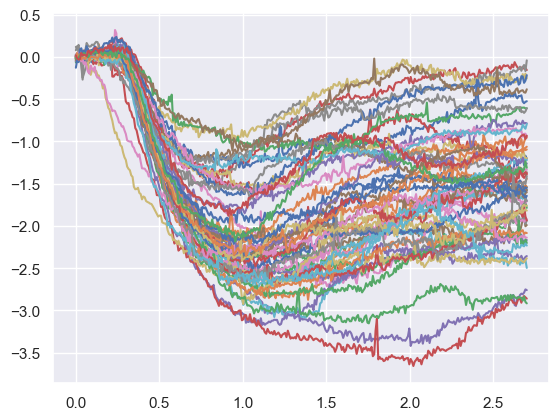

In [ ]:
%matplotlib inline
df_plot=pupil_diameter_df
plt.plot(time_x,df_plot)


### With thius new data format i can easily filter out assets with z_scores higher than 2

In [ ]:
pupil_diameter_df.describe()

,Asset0015.tif,Asset0034.tif,Asset0004.tif,Asset0010.tif,Asset0048.tif,Asset0026.tif,Asset0044.tif,Asset0016.tif,Asset0040.tif,Surprise02.tif,...,Asset0030.tif,Asset0033.tif,Asset0002.tif,Asset0046.tif,Asset0024.tif,Asset0001.tif,Asset0008.tif,Asset0006.tif,Asset0042.tif,Asset0037.tif
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,...,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,-1.471837,-1.777282,-1.636416,-0.527890,-2.382682,-1.756902,-1.647851,-0.619940,-0.410995,-1.862678,...,-1.346348,-1.438605,-1.783568,-1.843234,-1.699272,-1.941493,-1.432290,-1.456553,-1.243791,-1.058488
std,0.727714,0.861492,0.768729,0.467798,1.182233,0.762807,0.860109,0.449999,0.303965,0.935358,...,0.662938,0.670075,0.591486,0.794662,0.736487,0.815071,0.638412,0.693360,0.607605,0.535949
min,-2.376506,-2.874832,-2.421388,-1.425622,-3.420810,-2.444661,-2.714353,-1.532724,-0.975330,-3.085836,...,-2.300894,-2.186364,-2.386084,-2.660594,-2.411859,-2.700569,-2.213850,-2.358363,-2.183982,-1.879968
25%,-2.095354,-2.481685,-2.249598,-0.948866,-3.208874,-2.219396,-2.381679,-0.960393,-0.717720,-2.666480,...,-1.903463,-2.030934,-2.197733,-2.347409,-2.080230,-2.540644,-1.835016,-2.005604,-1.577440,-1.370476
50%,-1.451190,-1.817188,-1.798063,-0.435482,-2.990271,-2.099051,-1.786905,-0.530622,-0.305200,-1.868787,...,-1.272734,-1.563586,-1.949963,-2.145657,-2.010019,-2.232447,-1.558702,-1.576635,-1.346459,-1.145365
75%,-1.342494,-1.557362,-1.540092,-0.174598,-1.877979,-1.821323,-1.319054,-0.309507,-0.168620,-1.608168,...,-1.186016,-1.133100,-1.691026,-1.799159,-1.764134,-1.870840,-1.494010,-1.159693,-1.023469,-0.939212
max,0.121228,0.077496,0.102082,0.219558,0.147638,0.043552,0.112587,0.127193,0.050949,0.053202,...,0.061480,0.080343,0.049778,0.143626,0.048612,0.012702,0.133752,0.067680,0.084727,0.147697


### Do the plots

In [ ]:
np.median(pupil_diameter_df,axis=1)

array([-4.75593427e-03,  9.29665333e-03,  1.04813637e-02, -4.34672175e-03,
        3.22637288e-04,  2.10328999e-03,  7.95427886e-03,  1.02252638e-02,
        1.26460782e-02, -3.45874457e-03,  3.26963782e-03,  1.02807597e-02,
        1.15435109e-02,  1.22395084e-02,  8.97876364e-03,  1.51918518e-02,
        1.86535814e-02,  2.06340959e-02,  2.29859599e-02,  1.07680561e-02,
        1.37529821e-02,  1.62098956e-02,  7.43693278e-03,  2.42224840e-02,
        2.19467963e-02,  1.96638359e-02,  1.97181000e-02,  9.67496616e-03,
        1.60098054e-02,  1.10000918e-02,  1.87110859e-02,  2.46931334e-02,
        2.49831296e-02,  1.70175625e-02,  2.38364124e-04,  3.03776736e-03,
        4.52035102e-04, -1.50269011e-02, -3.64634811e-02, -4.22817406e-02,
       -8.79528374e-02, -1.29845867e-01, -1.45425796e-01, -2.05855000e-01,
       -2.24242925e-01, -2.65445926e-01, -3.18798267e-01, -3.65920005e-01,
       -4.17583950e-01, -4.56950391e-01, -5.13947052e-01, -5.55491189e-01,
       -5.85243629e-01, -

In [ ]:

mat=pupil_diameter_df.reindex(columns=
                                  even_asset).values
mat[window]


array([[-0.00411789, -0.0053702 , -0.06676297, ...,  0.00626177,
        -0.01451253,  0.01089036],
       [ 0.03081067,  0.01110961, -0.0354997 , ...,  0.03666657,
        -0.02382036, -0.0235171 ],
       [ 0.00185772, -0.01305556,  0.04982596, ..., -0.0320095 ,
        -0.01423603, -0.03579131],
       ...,
       [-1.13012401, -1.42819747, -1.57400414, ..., -0.85475163,
        -1.38210495, -1.03908303],
       [-1.09413566, -1.39047578, -1.5692077 , ..., -0.89537662,
        -1.36417199, -1.06159128],
       [-1.08509903, -1.41624087, -1.55401996, ..., -0.83215316,
        -1.3433952 , -1.05810791]])

## Now lets calculate the speed of change from the normalized data

Exclude data that is over [2,-2] z scores


NameError: name 'pupil_zscore' is not defined

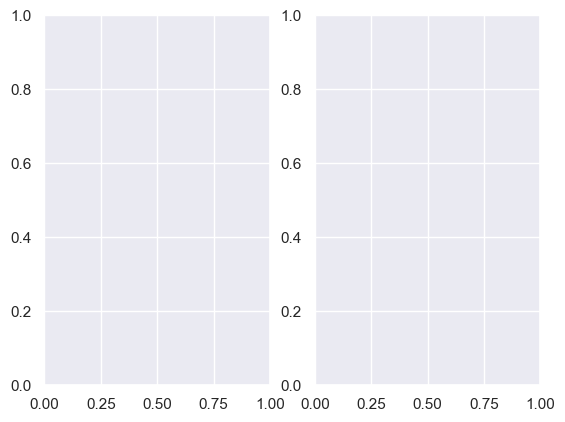

In [ ]:
fig,ax=plt.subplots(1,2)
sns.histplot(pupil_zscore[window,6],ax=ax[0])
sns.histplot(pupil_events_matrix[window,6],ax=ax[1])

In [ ]:
#test sfuntion
sigma=1
mu=10
data_normal=sigma*np.random.randn(70,100) +mu
data_norm=nm.normalize(values=data_normal.reshape(data_normal.size),
                                            type='z_score').reshape(data_normal.shape)
plt.plot(data_normal,'.',color='red')
plt.plot(data_norm,'.',color='blue')
plt.plot(data_normal-10,'.',color='green')


In [ ]:
plt.hist(data_normal)


In [ ]:
pupil_events_matrix.shape[0]

In [ ]:
r=a.reshape(pupil_events_matrix.shape)

In [ ]:
pupil_events_matrix.shape[0]*pupil_events_matrix.shape[1]

In [ ]:
pupil_events_matrix.shape

In [ ]:
# pupil_list=[]
# surface_list=[]
# ref_col=surfaces_pd_frame.columns.get_indexer(['gaze_timestamp'])[0]

# for row in range(20,200):#(surfaces_pd_frame.shape[0]-1):
#         ini_val=surfaces_pd_frame.iloc[row,ref_col]
#         end_value=surfaces_pd_frame.iloc[row+1,ref_col]
#         surface_row=surfaces_pd_frame.iloc[row:row+1]
#         # print(ini_val,end_value)
#         aux_pd_frame=cm.filter_rows_by_temporal_values(
#                 dataframe=pupil_pd_frame,
#                 time_column='pupil_timestamp',
#                 ini_value=ini_val,
#                 end_value=end_value
#                 )
#         aux_pd_frame.insert(0,'horizontal_index',row)
#         surface_row.insert(0,'horizontal_index',row)
#         # aux_pd_frame=aux_pd_frame.join(to_join,rsuffisx='sur_',how='cross')

#         pupil_list.append(aux_pd_frame)
#         surface_list.append(surface_row)
# # final_df=pd.concat(final_df,axis=0)
# # display(final_df)
        
# vert_stack=pd.concat(pupil_list,axis=0)
# horz_stack=pd.concat(surface_list,axis=0)
# vert_stack.head()
# final_df=[]
# for row,index in surfaces_pd_frame.iterrows():
#         ini_val=surfaces_pd_frame.iloc[row]['gaze_timestamp']
#         end_value=surfaces_pd_frame.iloc[row+1]['gaze_timestamp']
#         to_join=surfaces_pd_frame.iloc[row:row+1]
#         # print(ini_val,end_value)
#         aux_pd_frame=cm.filter_rows_by_temporal_values(
#                 dataframe=pupil_pd_frame,
#                 time_column='pupil_timestamp',
#                 ini_value=ini_val,
#                 end_value=end_value
#                 )

#         # aux_pd_frame=aux_pd_frame.join(to_join,rsuffix='sur_',how='cross')
#         final_df.append(aux_pd_frame)
# # final_df=pd.concat(final_df,axis=0)
# # display(final_df)


In [ ]:
df_A = pd.DataFrame({'start_date':['2017-03-27','2017-01-10'],'end_date':['2017-04-20','2017-02-01']})
df_B = pd.DataFrame({'event_date':['2017-01-20','2017-01-27'],'price':[100,200]})

df_A['end_date'] = pd.to_datetime(df_A.end_date)
df_A['start_date'] = pd.to_datetime(df_A.start_date)
df_B['event_date'] = pd.to_datetime(df_B.event_date)
df_B

,event_date,price
0,2017-01-20,100
1,2017-01-27,200


In [ ]:
df_merge = df_A.merge(df_B, how='cross')
df_merge

,start_date,end_date,event_date,price
0,2017-03-27,2017-04-20,2017-01-20,100
1,2017-03-27,2017-04-20,2017-01-27,200
2,2017-01-10,2017-02-01,2017-01-20,100
3,2017-01-10,2017-02-01,2017-01-27,200


In [ ]:
df_merge = df_merge.query('event_date >= start_date and event_date <= end_date')
df_merge

,start_date,end_date,event_date,price
2,2017-01-10,2017-02-01,2017-01-20,100
3,2017-01-10,2017-02-01,2017-01-27,200


In [ ]:
surfaces_pd_frame['start']=surfaces_pd_frame['gaze_timestamp']
surfaces_pd_frame['end']=np.append(surfaces_pd_frame['gaze_timestamp'].values[1:],0)
surfaces_pd_frame.drop(surfaces_pd_frame.tail(1).index,inplace=True)
surfaces_pd_frame['event']=np.arange(len(surfaces_pd_frame))
# idx = pd.IntervalIndex.from_arrays(surfaces_pd_frame['start'], df_2['end'], closed='both')

In [ ]:
surfaces_pd_frame.index = pd.IntervalIndex.from_arrays(surfaces_pd_frame['start'],surfaces_pd_frame['end'],closed='both')
surfaces_pd_frame

,world_timestamp,world_index,gaze_timestamp,x_norm,y_norm,x_scaled,y_scaled,on_surf,confidence,start,end,event
"[14963.464168400002, 14963.468149400003]",14963.529049,0,14963.464168,0.390105,-0.042263,0.390105,-0.042263,False,0.990000,14963.464168,14963.468149,0
"[14963.468149400003, 14963.472153400002]",14963.529049,0,14963.468149,0.385552,-0.102956,0.385552,-0.102956,False,0.990000,14963.468149,14963.472153,1
"[14963.472153400002, 14963.476132400005]",14963.529049,0,14963.472153,0.379080,-0.151352,0.379080,-0.151352,False,0.990000,14963.472153,14963.476132,2
"[14963.476132400005, 14963.4801314]",14963.529049,0,14963.476132,0.373581,-0.219004,0.373581,-0.219004,False,0.990000,14963.476132,14963.480131,3
"[14963.4801314, 14963.4841224]",14963.529049,0,14963.480131,0.366127,-0.282971,0.366127,-0.282971,False,0.990000,14963.480131,14963.484122,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"[15616.681685400004, 15616.685702400002]",15616.684612,38927,15616.681685,0.353888,0.368990,0.353888,0.368990,True,0.918658,15616.681685,15616.685702,159420
"[15616.685702400002, 15616.6896554]",15616.684612,38927,15616.685702,0.333188,0.345879,0.333188,0.345879,True,0.937488,15616.685702,15616.689655,159421
"[15616.6896554, 15616.693664400002]",15616.684612,38927,15616.689655,0.321895,0.354199,0.321895,0.354199,True,0.937488,15616.689655,15616.693664,159422
"[15616.693664400002, 15616.697709400005]",15616.700605,38928,15616.693664,0.296020,0.369735,0.296020,0.369735,True,0.913507,15616.693664,15616.697709,159423


In [ ]:
pupil_pd_frame['event'] = pupil_pd_frame['pupil_timestamp'].apply(lambda x : surfaces_pd_frame.iloc[surfaces_pd_frame.index.get_loc(x)]['event'])

KeyError: 15616.703703400002